## Problem Statement: SMS Classifier : Develop a text classification model toclassify SMS as either spam or non-spamusing data science techniques in Python.

## Importing Requird libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Loading Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# Displaying first rows of dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Displaying last rows of dataset
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
#shape of dataset
df.shape

(5572, 5)

In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Keep only necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

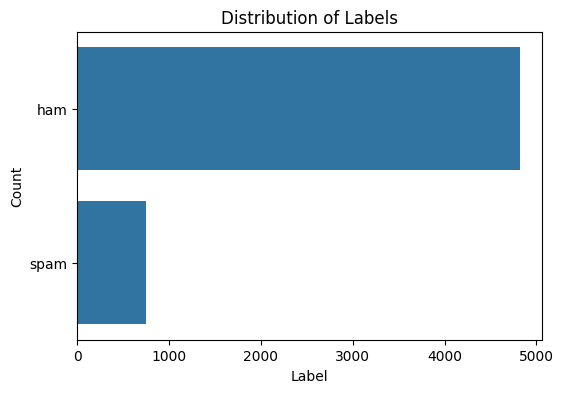

In [ ]:
# Visualize the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(df['label'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Encode labels  (ham: 0, spam: 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Clean text function with NLTK stopwords removal and stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
# Apply text cleaning
df['message'] = df['message'].apply(clean_text)

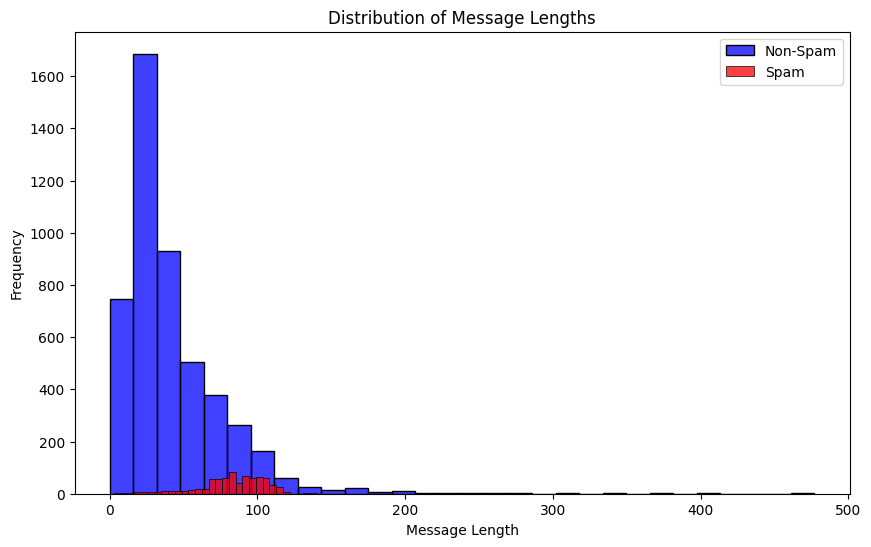

In [ ]:
# Visualize the length of messages
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 0]['message_length'], bins=30, color='blue', label='Non-Spam')
sns.histplot(df[df['label'] == 1]['message_length'], bins=30, color='red', label='Spam')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


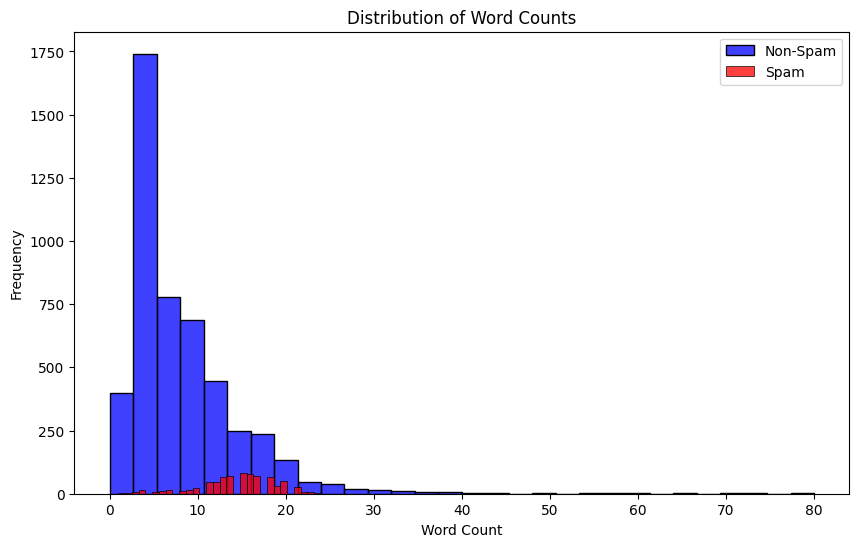

In [ ]:
# Visualize the distribution of word counts
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 0]['word_count'], bins=30, color='blue', label='Non-Spam')
sns.histplot(df[df['label'] == 1]['word_count'], bins=30, color='red', label='Spam')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

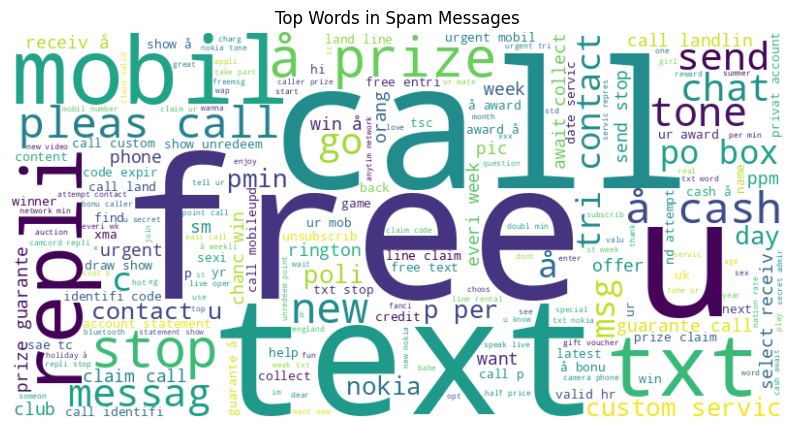

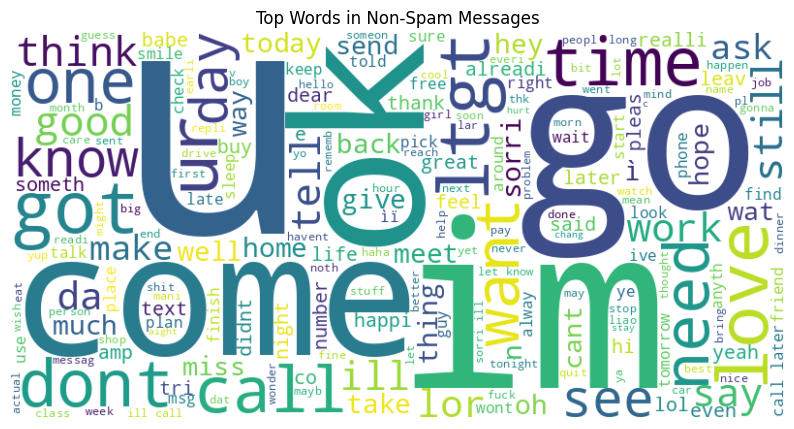

In [ ]:
# Visualize the top words in spam vs. non-spam messages using WordCloud
spam_words = ' '.join(df[df['label'] == 1]['message'])
non_spam_words = ' '.join(df[df['label'] == 0]['message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_words)

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Spam Messages')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Non-Spam Messages')
plt.show()

## Split the data into training and testing sets

In [ ]:
# Split the data
X = df['message']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define and train multiple models

Naive Bayes:

Accuracy: 0.967713004484305
Confusion Matrix:
[[965   0]
 [ 36 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


------------------------------------------------------------



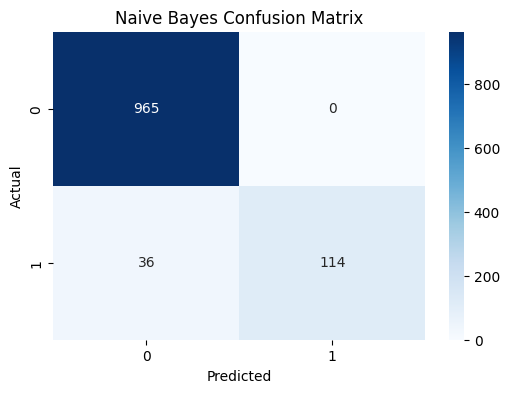

Logistic Regression:

Accuracy: 0.9488789237668162
Confusion Matrix:
[[961   4]
 [ 53  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115


------------------------------------------------------------



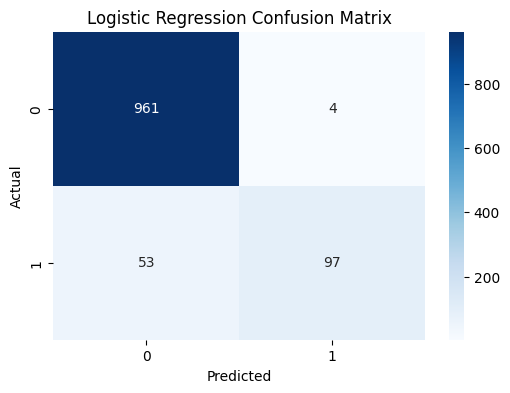

SVM:

Accuracy: 0.97847533632287
Confusion Matrix:
[[962   3]
 [ 21 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


------------------------------------------------------------



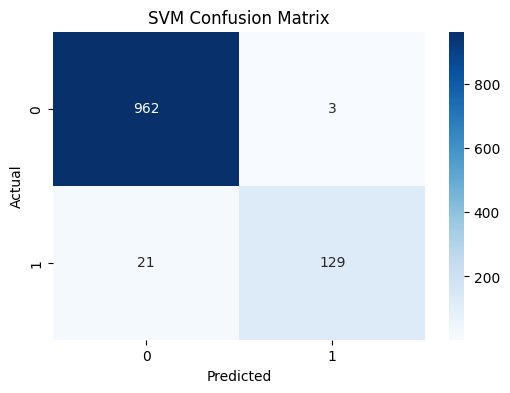

Decision Tree:

Accuracy: 0.9623318385650225
Confusion Matrix:
[[948  17]
 [ 25 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       965
           1       0.88      0.83      0.86       150

    accuracy                           0.96      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115


------------------------------------------------------------



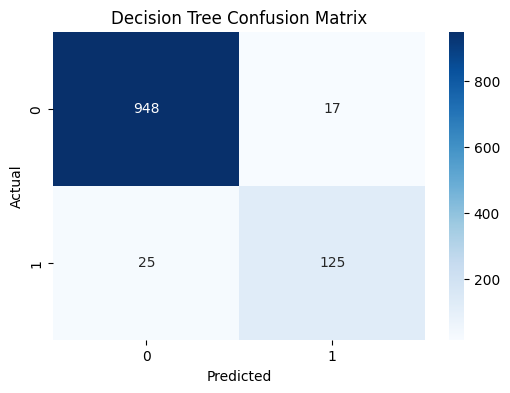

Random Forest:

Accuracy: 0.97847533632287
Confusion Matrix:
[[965   0]
 [ 24 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


------------------------------------------------------------



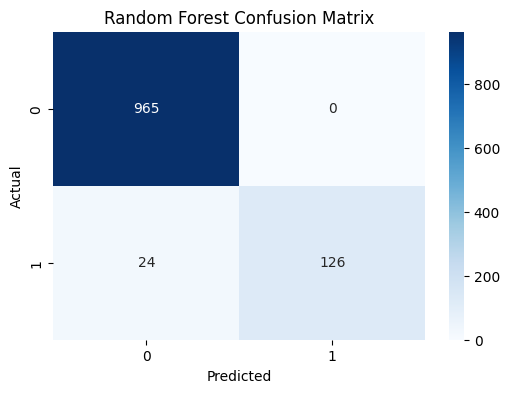

In [ ]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Create pipeline with TF-IDF vectorizer and model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    results[model_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report
    }

    print(f'{model_name}:\n')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print('\n' + '-'*60 + '\n')

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

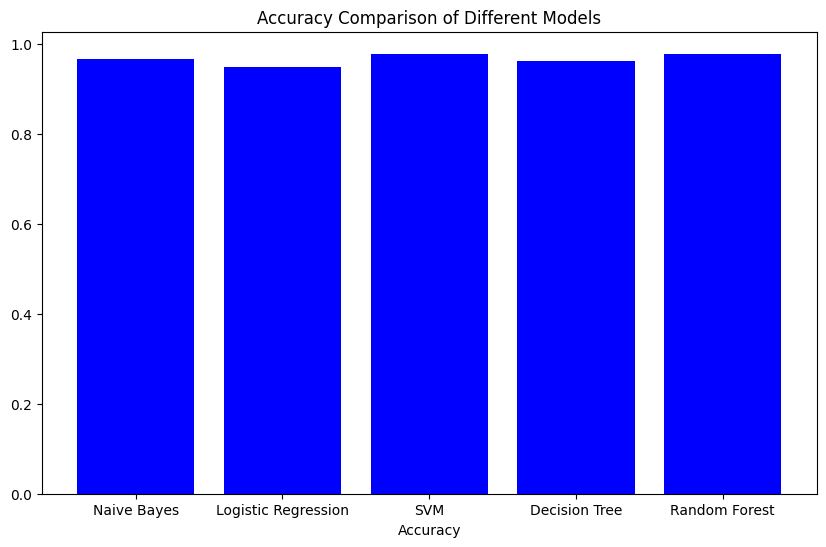

In [ ]:
# Plot accuracy comparison
accuracy_data = {model: results[model]["accuracy"] for model in models}

plt.figure(figsize=(10, 6))
plt.bar(list(accuracy_data.keys()), list(accuracy_data.values()), color='Blue')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()


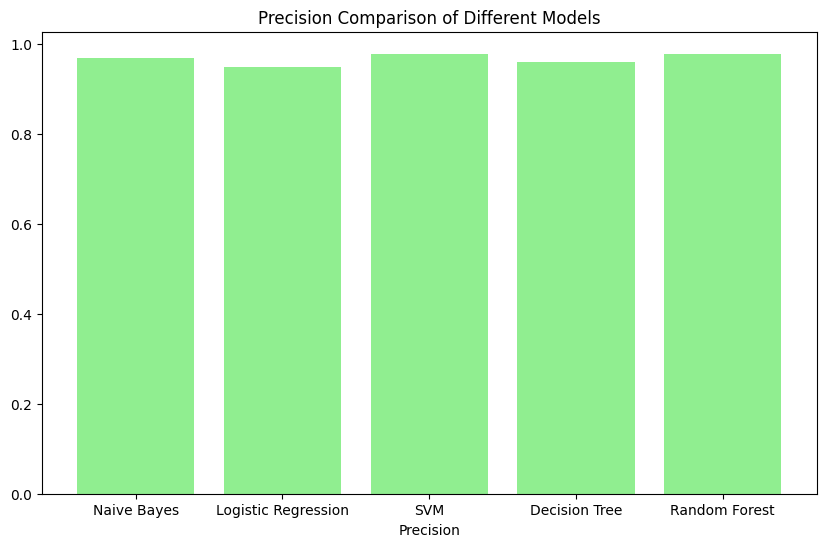

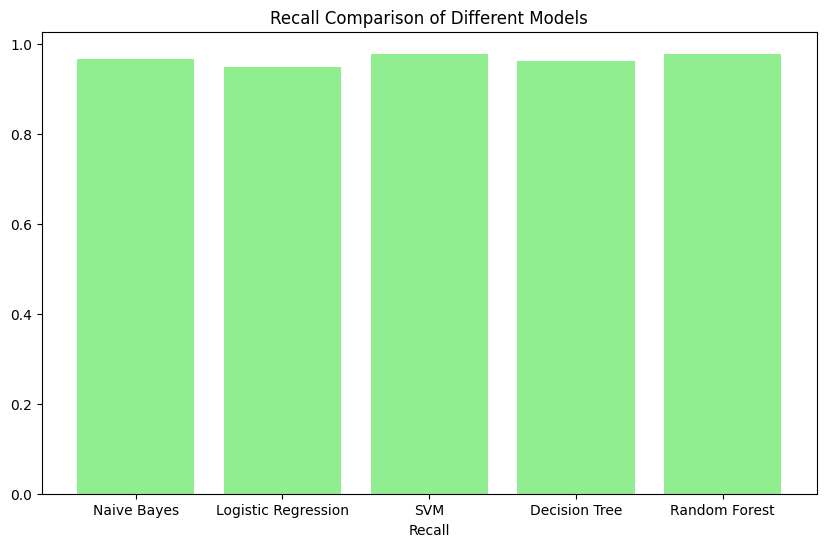

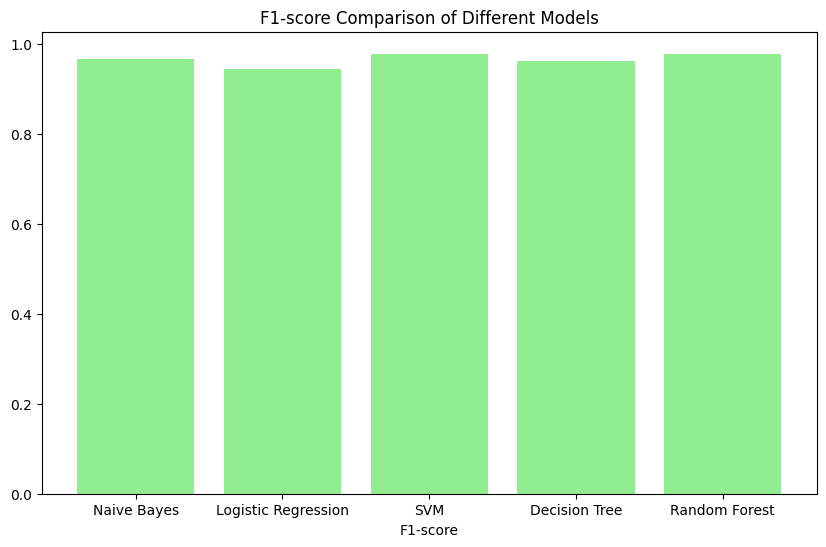

In [ ]:
# Plot detailed comparison for precision, recall, and f1-score
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    metric_data = {model: results[model]["class_report"]['weighted avg'][metric] for model in models}

    plt.figure(figsize=(10, 6))
    plt.bar(list(metric_data.keys()), list(metric_data.values()), color='lightgreen')
    plt.xlabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison of Different Models')
    plt.show()

**- Conclusion of Results:**

**- Accuracy Comparison:** The bar plot of accuracies shows the performance of each model. Typically, models like RandomForestClassifier and LogisticRegression tend to perform better in text classification tasks.

**- Precision, Recall, and F1-Score Comparison:** The detailed comparison of precision, recall, and F1-score provides insights into the balance between false positives and false negatives. Higher precision indicates fewer false positives, while higher recall indicates fewer false negatives. F1-score balances both precision and recall.